In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
data_folder = 'data'

# Створення порожнього датафрейму для збереження оброблених даних
columns = ['X_mean', 'X_std', 'X_median', 'X_max', 'X_min', 'X_interquartile_range',
           'Y_mean', 'Y_std', 'Y_median', 'Y_max', 'Y_min', 'Y_interquartile_range',
           'Z_mean', 'Z_std', 'Z_median', 'Z_max', 'Z_min', 'Z_interquartile_range', 'label']

processed_data = pd.DataFrame(columns=columns)

# Ітерація по папках в data_folder
for activity_folder in os.listdir(data_folder):
    activity_path = os.path.join(data_folder, activity_folder)

    # Ітерація по файлах .csv в поточній папці
    for file_name in os.listdir(activity_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(activity_path, file_name)

            # Зчитування даних з файлу .csv
            df = pd.read_csv(file_path)

            # Ітерація по кожному стовпцю акселерометра
            time_domain_features = pd.Series(index=columns)

            for column in ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']:
                if column == 'accelerometer_X':
                    col = "X"
                elif column == 'accelerometer_Y':
                    col = "Y"
                elif column == 'accelerometer_Z':
                    col = "Z"
                # Розрахунок часових ознак для кожного вимірювання
                time_domain_features[f'{col}_mean'] = df[column].mean()
                time_domain_features[f'{col}_std'] = df[column].std()
                time_domain_features[f'{col}_median'] = df[column].median()
                time_domain_features[f'{col}_max'] = df[column].max()
                time_domain_features[f'{col}_min'] = df[column].min()
                time_domain_features[f'{col}_interquartile_range'] = df[column].quantile(0.75) - df[column].quantile(0.25)
 
            # Додавання стовпця з міткою класу
            activity_label = activity_folder.lower()
            if 'idle' in activity_label:
                time_domain_features['label'] = 0
            elif 'walking' in activity_label:
                time_domain_features['label'] = 1
            elif 'stairs' in activity_label:
                time_domain_features['label'] = 2
            elif 'running' in activity_label:
                time_domain_features['label'] = 3
            new_data = pd.DataFrame(time_domain_features).transpose()

            # Додавання оброблених даних до загального датафрейму
            processed_data = pd.concat([processed_data, new_data], axis=0, ignore_index=True)

print(processed_data.head())

# Збереження оброблених даних в новий файл
processed_data.to_csv('processed_data.csv', index=False)

C:\Users\olegd\AppData\Local\Temp\ipykernel_14400\2443824570.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  processed_data = pd.concat([processed_data, new_data], axis=0, ignore_index=True)


     X_mean     X_std  X_median     X_max     X_min  X_interquartile_range  \
0  0.178448  1.036361 -0.102950  5.099650 -0.909797               0.065840   
1 -0.098641  0.125848 -0.114922  0.407014 -0.320823               0.039505   
2 -0.099918  0.015642 -0.100556 -0.062249 -0.124498               0.021548   
3  0.400949  0.052889  0.392649  0.560243  0.268151               0.050279   
4  0.400949  0.053187  0.402226  0.560243  0.268151               0.051476   

     Y_mean     Y_std  Y_median     Y_max     Y_min  Y_interquartile_range  \
0  0.167435  1.157603 -0.131681  4.616021 -0.282516               0.046687   
1 -0.131202  0.048059 -0.131681  0.023942 -0.244209               0.022745   
2  0.220905  0.016383  0.225055  0.244209  0.177171               0.019154   
3 -0.029528  0.054525 -0.021548  0.086191 -0.205901               0.040701   
4 -0.027134  0.054004 -0.019154  0.086191 -0.205901               0.040702   

     Z_mean     Z_std  Z_median     Z_max     Z_min  Z_interqu

Нормалізація даних за допомогою MinMaxScaler()

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Зчитування даних з файлу
df = pd.read_csv('processed_data.csv')

# Виділення всіх ознак, окрім мітки класу
features = df.drop('label', axis=1)

scaler = MinMaxScaler()

normalized_features = scaler.fit_transform(features)

# Створення нормалізованого датасету
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
normalized_df['label'] = df['label']

print(normalized_df.head())

     X_mean     X_std  X_median     X_max     X_min  X_interquartile_range  \
0  0.363648  0.064118  0.348714  0.141979  0.952915               0.002218   
1  0.350022  0.007139  0.347958  0.023864  0.967577               0.001109   
2  0.349960  0.000242  0.348865  0.012053  0.972464               0.000353   
3  0.374589  0.002573  0.380030  0.027721  0.982239               0.001563   
4  0.374589  0.002592  0.380635  0.027721  0.982239               0.001613   

     Y_mean     Y_std  Y_median     Y_max     Y_min  Y_interquartile_range  \
0  0.492856  0.057738  0.450849  0.205721  0.852660               0.001061   
1  0.481343  0.001872  0.450849  0.100220  0.853500               0.000398   
2  0.494917  0.000278  0.463367  0.105281  0.862735               0.000298   
3  0.485262  0.002198  0.454713  0.101650  0.854339               0.000895   
4  0.485355  0.002172  0.454797  0.101650  0.854339               0.000895   

     Z_mean     Z_std  Z_median     Z_max     Z_min  Z_interqu

Візуалізація даних

C:\Users\olegd\AppData\Local\Temp\ipykernel_14400\2764899073.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='label', y=f'{axis}_{feature}', data=normalized_df, ax=axes[row, col], palette='Set3')
C:\Users\olegd\AppData\Local\Temp\ipykernel_14400\2764899073.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='label', y=f'{axis}_{feature}', data=normalized_df, ax=axes[row, col], palette='Set3')
C:\Users\olegd\AppData\Local\Temp\ipykernel_14400\2764899073.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='label', y=f'{axis}

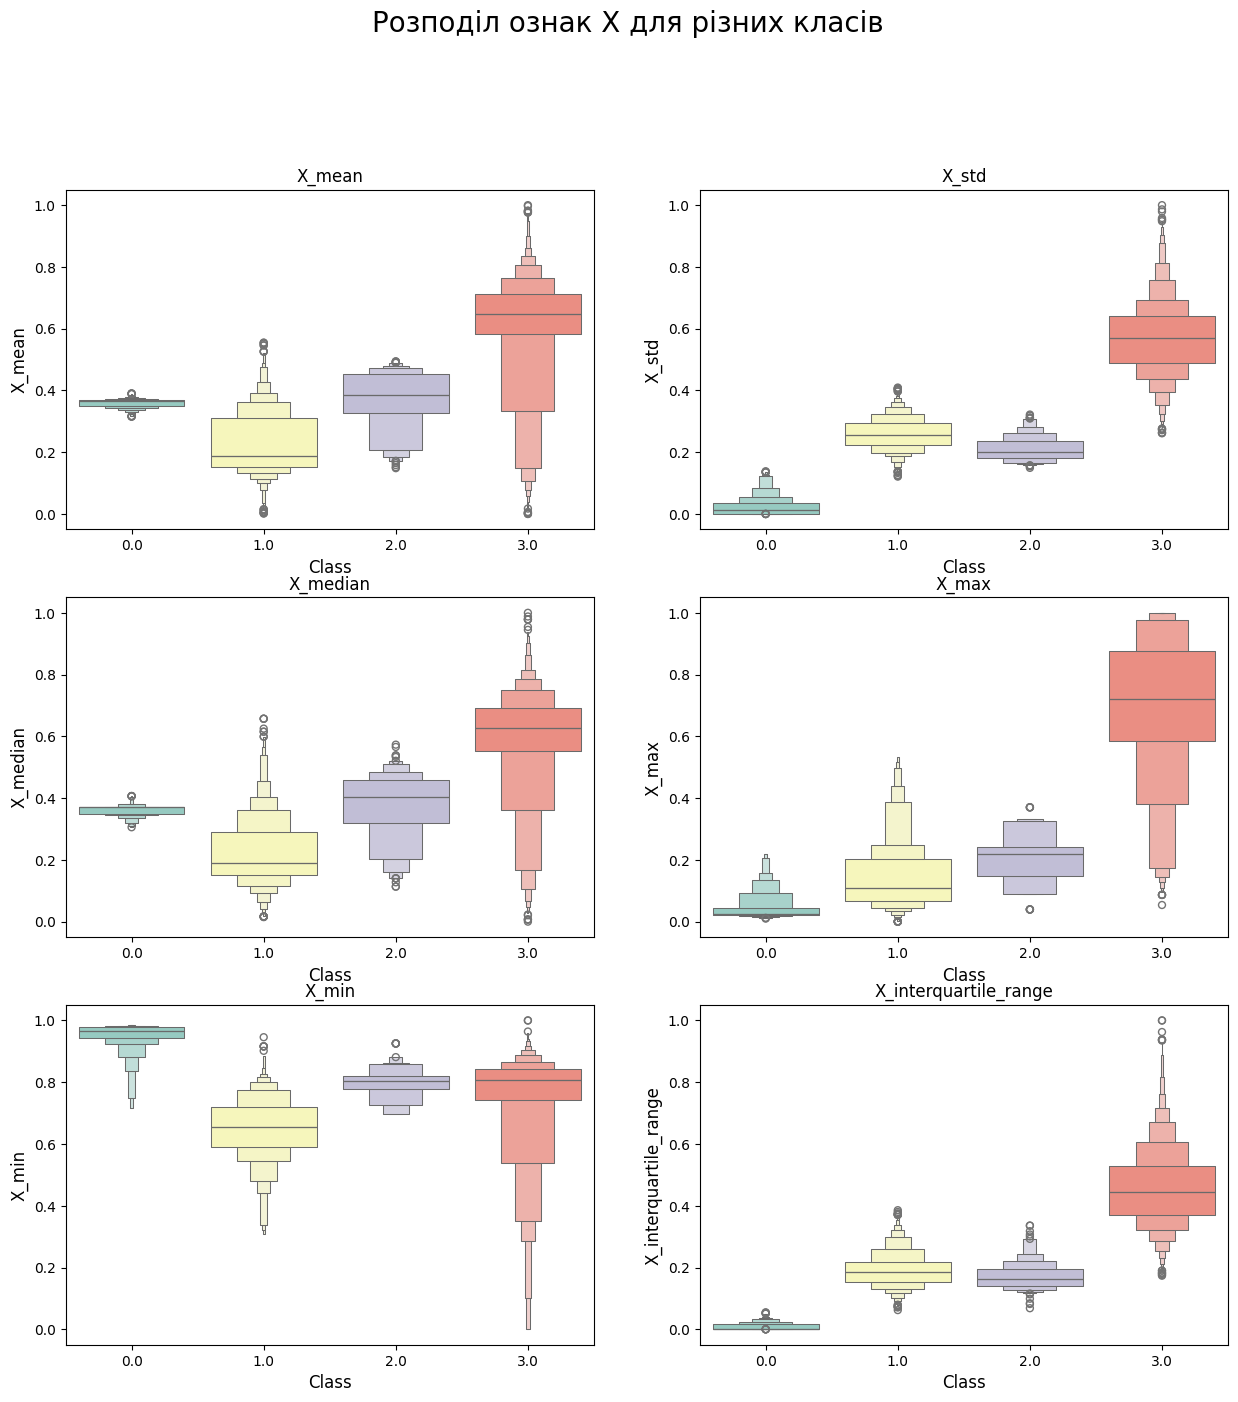

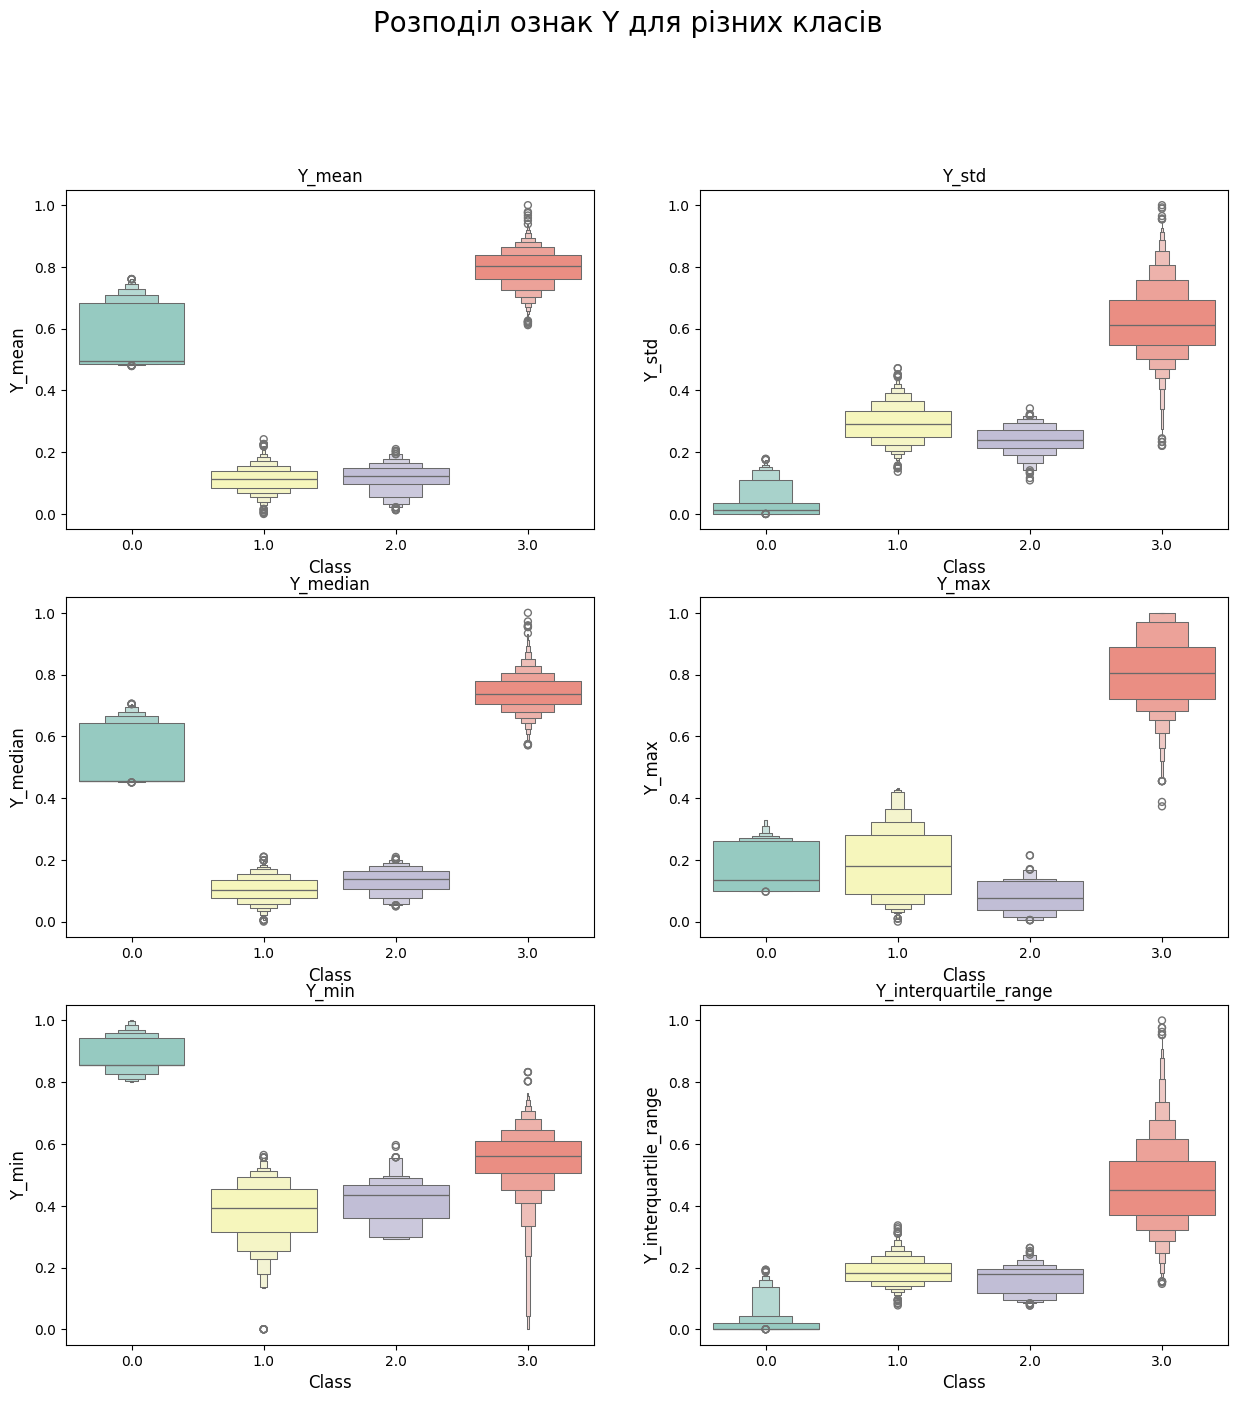

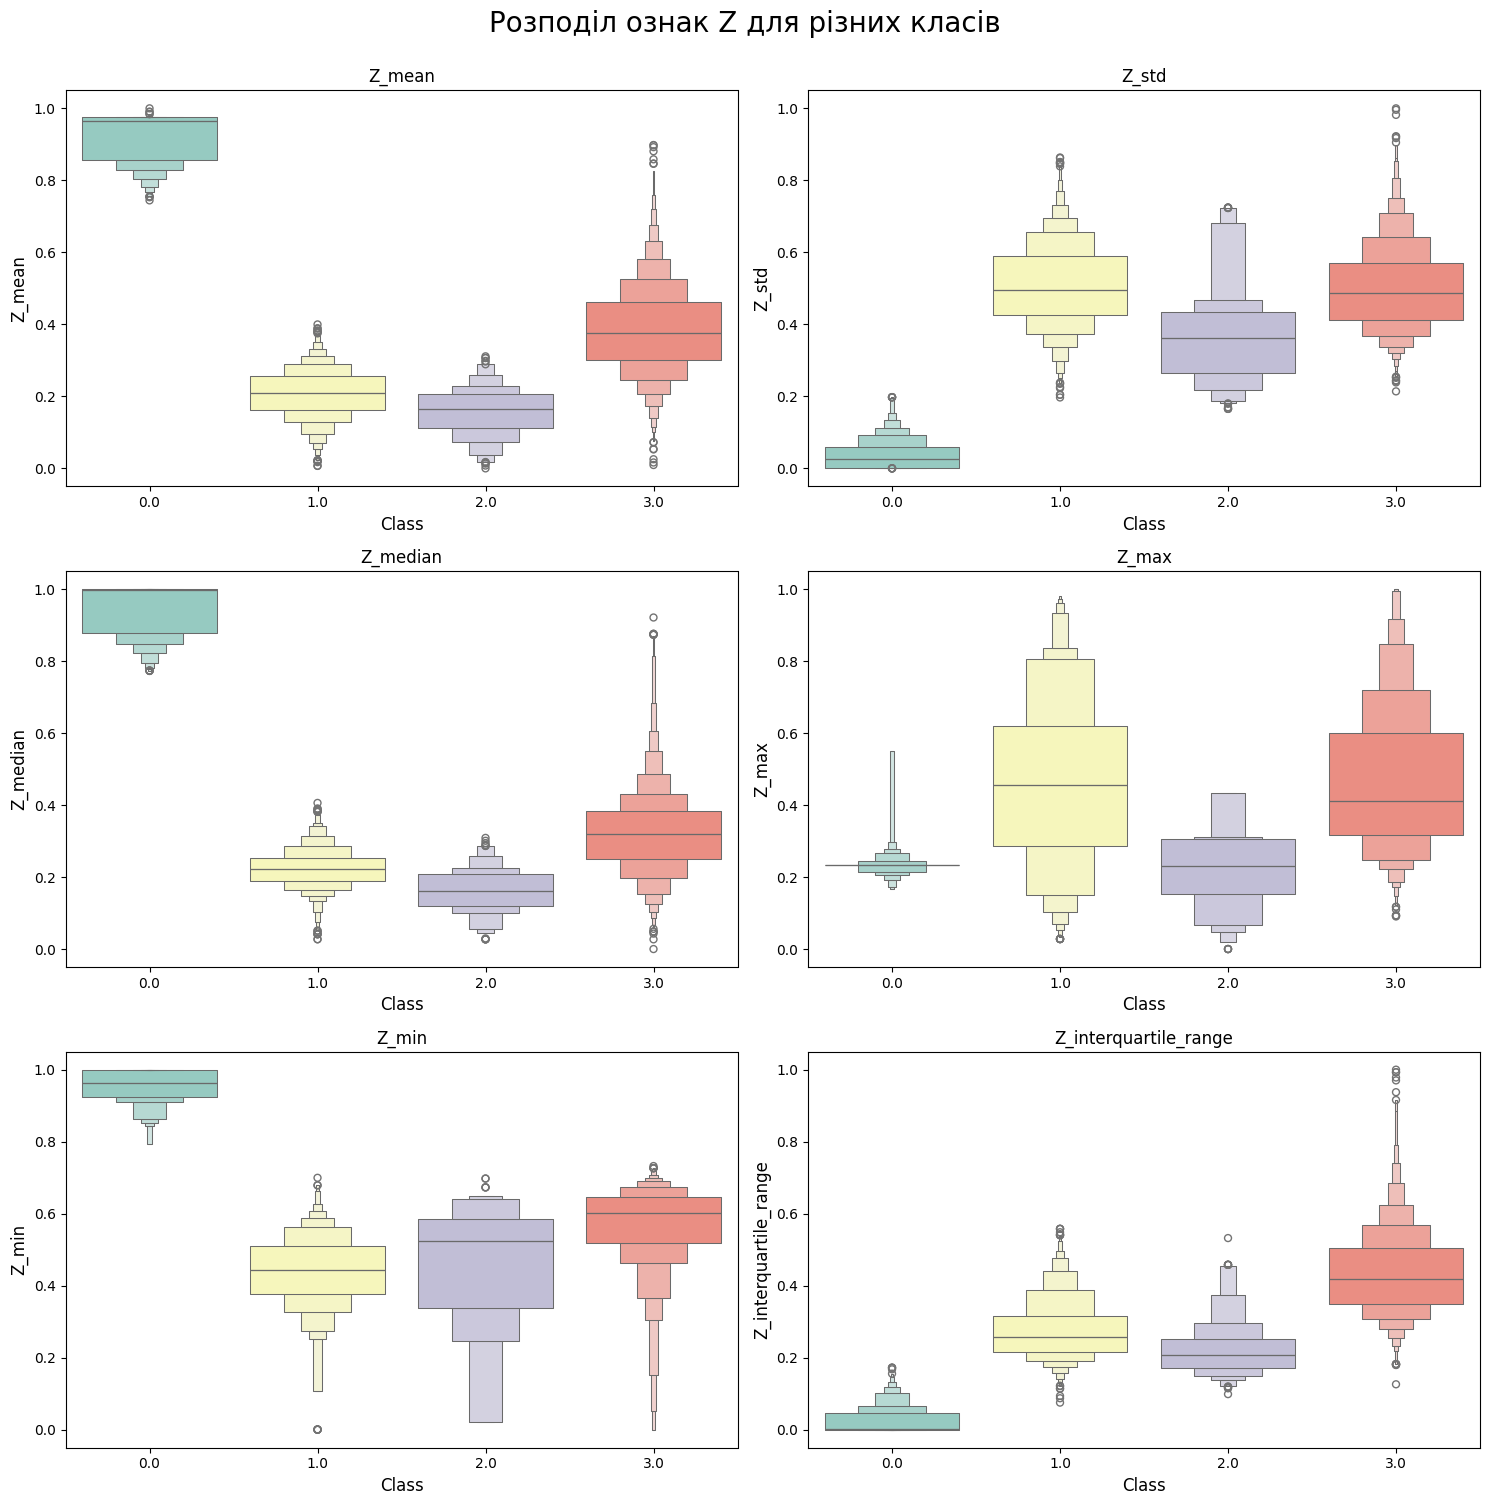

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['mean', 'std', 'median', 'max', 'min', 'interquartile_range']

for axis in ['X', 'Y', 'Z']:
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle(f'Розподіл ознак {axis} для різних класів', y=1.0, fontsize=20)
    
    for ax in axes.flatten():
        ax.title.set_fontsize(12)
        ax.xaxis.label.set_fontsize(12)
        ax.yaxis.label.set_fontsize(12)
    
    for j, feature in enumerate(features):
        row, col = divmod(j, 2)
        sns.boxenplot(x='label', y=f'{axis}_{feature}', data=normalized_df, ax=axes[row, col], palette='Set3')
        axes[row, col].set_title(f'{axis}_{feature}')
        axes[row, col].set_xlabel('Class')
        axes[row, col].set_ylabel(f'{axis}_{feature}')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X = normalized_df.drop('label', axis=1)  # Ознаки (усі стовпці, крім 'label')
y = normalized_df['label']  # Цільова змінна (стовпець 'label')

# Поділ на тренувальну і тестову вибірки (80% - тренувальна, 20% - тестова)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Виведення розмірів отриманих вибірок
print("Розміри тренувальної вибірки (X_train, y_train):", X_train.shape, y_train.shape)
print("Розміри тестової вибірки (X_test, y_test):", X_test.shape, y_test.shape)

Розміри тренувальної вибірки (X_train, y_train): (5169, 18) (5169,)
Розміри тестової вибірки (X_test, y_test): (1293, 18) (1293,)


Побудова моделей за допомогою алгоритмів SVM та випадковий ліс з бібліотеки scikit-learn

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Модель SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Модель випадкового лісу
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Вивід результатів за допомогою classification report
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       220
         1.0       0.97      1.00      0.98       354
         2.0       0.95      0.67      0.78        30
         3.0       1.00      1.00      1.00       689

    accuracy                           0.99      1293
   macro avg       0.98      0.92      0.94      1293
weighted avg       0.99      0.99      0.99      1293


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       220
         1.0       1.00      1.00      1.00       354
         2.0       0.97      0.97      0.97        30
         3.0       1.00      1.00      1.00       689

    accuracy                           1.00      1293
   macro avg       0.99      0.99      0.99      1293
weighted avg       1.00      1.00      1.00      1293



Висновок:
Загалом, обидві моделі мають високу точність та ефективність на тестових даних. Модель Random Forest дає кращі результати і досягає 100% точності.